In [1]:
import numpy as np
import tensorflow as tf

print(tf.__version__)

#config = tf.ConfigProto(intra_op_parallelism_threads=3, inter_op_parallelism_threads=3, \
#                        allow_soft_placement=True, device_count = {'CPU': 1})
#session = tf.Session(config=config)
session = tf.InteractiveSession()


C:\Users\alkor\AppData\Local\conda\conda\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.6.0


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

trainX = mnist.train.images.reshape((-1,28,28)) # convert from (batch, 784) to (batch, 28, 28) to make ordinary images
trainY = mnist.train.labels

testX = mnist.test.images.reshape((-1,28,28))
testY = mnist.test.labels

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
(55000, 28, 28)
(55000, 10)
(10000, 28, 28)
(10000, 10)


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_img(sample):
    pixels = np.array(sample, dtype = 'float32')
    #
    plt.imshow(pixels)
    plt.show()
    

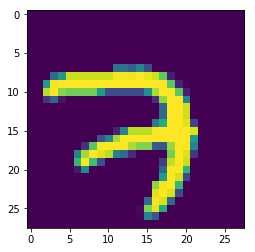

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


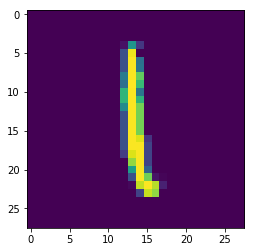

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


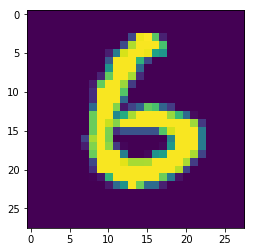

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


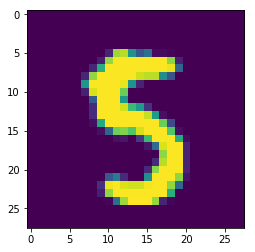

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


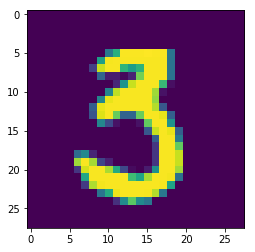

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


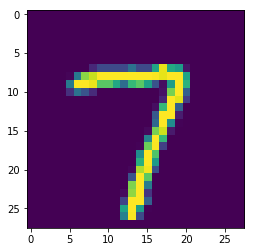

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


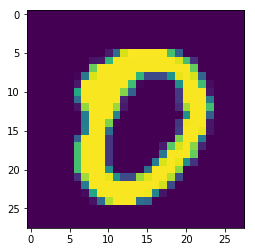

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


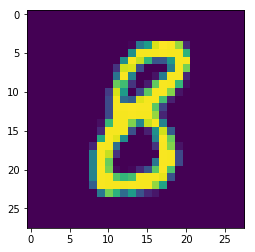

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


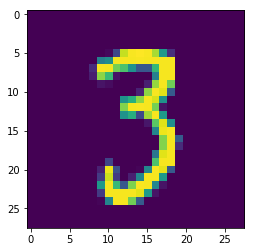

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


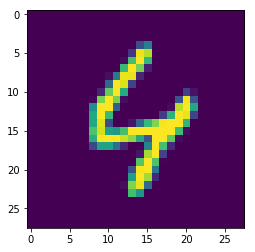

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


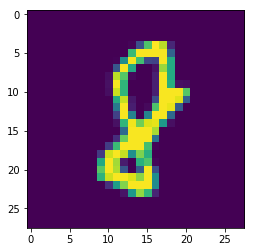

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


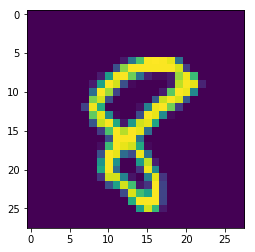

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


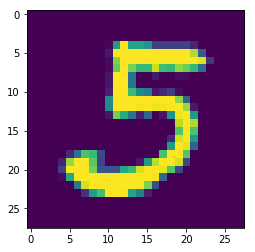

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


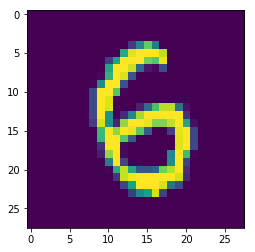

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


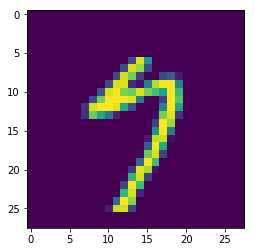

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


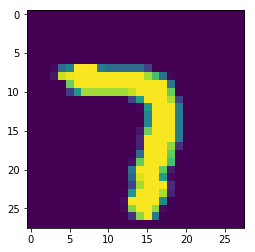

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


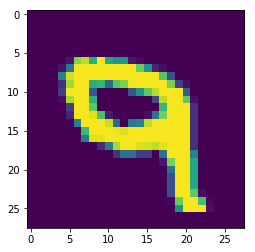

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


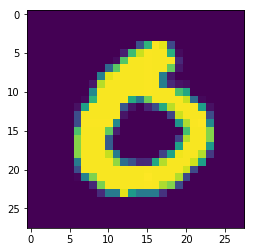

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


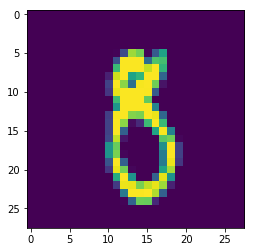

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


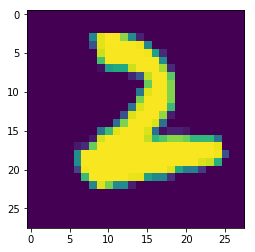

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [4]:
for i in range(20):
    show_img(trainX[i*20, :])
    print (trainY[i*20])

In [5]:
example_num, input_n, input_m = trainX.shape
output_num = len(trainY[0,:])
print(example_num, input_n, input_m, output_num)

55000 28 28 10


In [6]:
# here we operate with 4D objects (called here tensor) and most functions are vector-functions
# first dimenstion correspond to batch

# placeholder is a special tf-type. It means that you will 'place' a data to it in runtime.
# we have to specify a shape and a type only.
# we can leave first shape as None. It means batch size will be specified at runtime
x = tf.placeholder(tf.float32, shape=(None, input_n, input_m), name='x') # don't rename it
y = tf.placeholder(tf.float32, shape=(None, output_num), name='y') # don't rename it

# make shape 4d; (batch, size, size) -> (batch, size, size, channel). It's requred by conv op
x_4D = tf.expand_dims(x, axis=3)

#MODEL DEFINITIAN.
#You are able to chage filter sizes, filter numbers, initialization (truncated normal, zeros, here), activation func, etc
#You can add new layers, but you should explain me why you added it.

#init stats
mu = 0.0
sigma = 0.1

# convolution. see https://www.tensorflow.org/api_docs/python/tf/nn/conv2d

# Layer 1: Convolutional. Input = 28x28x1. Output = 20x20x6.
conv1_w = tf.Variable(tf.truncated_normal(shape = [7,7,1,6],mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(6))
conv1 = tf.nn.conv2d(x_4D,conv1_w, strides = [1,1,1,1], padding = 'SAME') + conv1_b 
# TODO: Activation.
conv1 = tf.nn.relu(conv1)

# Pooling. Input = 20x20x6. Output = 10x10x6.
pool_1 = tf.nn.max_pool(conv1,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')

# Layer 2: Convolutional.Sizes ________(write here)
conv2_w = tf.Variable(tf.truncated_normal(shape = [5,5,6,8],mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(8))
conv2 = tf.nn.conv2d(pool_1,conv2_w, strides = [1,1,1,1], padding = 'VALID') + conv2_b 
#  Activation.
conv2 = tf.nn.relu(conv2)

# TODO: Pooling. Sizes ________(write here)
pool_2 = tf.nn.max_pool(conv2,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')


#make it flatten 
flat = tf.contrib.layers.flatten(pool_2)

# Layer 4: Fully-connected. Sizes _________ (write here)
# layers from tf.contrib is high-level. You don't need to define weights, biases, etc manually  :)
fc1 = tf.contrib.layers.fully_connected(flat, 100)

#https://www.tensorflow.org/api_docs/python/tf/nn/dropout
# dropuout is a kind of regularization. # regularization prevents from overfitting
# use placeholder for change behavier in train-time and inference-time
keep_prob = tf.placeholder(tf.float32, shape=(), name='keep_prob')
fc1 = tf.contrib.layers.dropout(fc1, keep_prob=keep_prob)

#none means no activation function. it's needed for stability in cross-entropy.
y_pred = tf.contrib.layers.fully_connected(flat, output_num, activation_fn=None)

# cross-Entropy loss
#cost = -tf.reduce_mean(tf.reduce_sum((y*tf.log(y_pred)+(1-y)*tf.log(1-y_pred)), reduction_indices=1))
# see https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits_v2
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=y_pred))

# Regularization. You can penalti model by adding additional member to your loss function(cost)
# popular regularization is L2 called weight decay, L1, and L1 + L2 called Lasso
# regularization prevents from overfitting
# tf.trainable_variables() - list of all variables
#cost = cost + some_norm_from(weights) 

lr = 0.01 # learning rate
optimizer = tf.train.GradientDescentOptimizer(lr)
update = optimizer.minimize(cost)

pred = tf.cast(tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1)), tf.float32)
acc = tf.reduce_mean(pred) # don't rename this op




In [22]:
#Train!
# don't use test data here

# we should split the data into mini-batches.
# little batch is better but slower
# big bacth is faster and little bit worse. And limited by your GPU memory
batch_size = 256
epocs=20 # 1 epoch is view of all elements in dataset 1 time
batch_num = int(example_num/batch_size) # here we loose a rest of batch you can add it

session.run(tf.global_variables_initializer()) # it's necessary


for epoch in range(epocs):
    err = 0
    acc_train_ = 0.0

    for batch in range(batch_num):
        # extract a batch
        batch_x = trainX[batch*batch_size : batch*batch_size + batch_size]
        batch_y = trainY[batch*batch_size : batch*batch_size + batch_size]
        
        # a key operation. Run 'operations' and place data in placeholders 'x' and 'y'
        _, err_, acc_train = session.run([update, cost, acc], feed_dict={x:batch_x, y:batch_y, keep_prob:0.95})
        err += err_
        acc_train_ += acc_train
    err /= batch_num
    acc_train_ /= batch_num

    print("epoch: %d error:%f, acc_train: %f" % (epoch, err, acc_train_))
    
    acc_test = session.run([acc], feed_dict={x:testX, y:testY})
    print('acc_test:%f'%acc_test[0])

print("optimization done")




epoch: 0 error:2.135970, acc_train: 0.258050
acc_test:0.612300
epoch: 1 error:0.790342, acc_train: 0.786379
acc_test:0.874500
epoch: 2 error:0.400475, acc_train: 0.883634
acc_test:0.904400
epoch: 3 error:0.324852, acc_train: 0.904315
acc_test:0.918400
epoch: 4 error:0.283701, acc_train: 0.916381
acc_test:0.929000
epoch: 5 error:0.254737, acc_train: 0.925307
acc_test:0.936700
epoch: 6 error:0.232440, acc_train: 0.932079
acc_test:0.941600
epoch: 7 error:0.214493, acc_train: 0.937062
acc_test:0.946600
epoch: 8 error:0.199668, acc_train: 0.941224
acc_test:0.950300
epoch: 9 error:0.187231, acc_train: 0.944674
acc_test:0.952000
epoch: 10 error:0.176652, acc_train: 0.947795
acc_test:0.954200
epoch: 11 error:0.167505, acc_train: 0.950277
acc_test:0.956400
epoch: 12 error:0.159536, acc_train: 0.952486
acc_test:0.957400
epoch: 13 error:0.152526, acc_train: 0.954768
acc_test:0.958600
epoch: 14 error:0.146319, acc_train: 0.956411
acc_test:0.959800
epoch: 15 error:0.140787, acc_train: 0.958327
acc_

In [23]:
# Test!
# don't change these line

acc_test = session.run([acc], feed_dict={x:testX, y:testY})
print('acc:%f'%acc_test[0])

acc:0.965400
